# Linear Regression

Problem Statement: 

Company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Import necessary libraries

In [1]:
# For data analysis and numerical functions
import numpy as np
import pandas as pd

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Problem Statement : Train a linear regression algorithm to predict the demand for shared bikes using given information

In [8]:
#Attribute information in order.

#  instant: record index
#  dteday : date
#  season : season (1:spring, 2:summer, 3:fall, 4:winter)  //season
#  yr : year (0: 2018, 1:2019)
#  mnth : month ( 1 to 12)
#  holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#  weekday : day of the week
#  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#  weathersit : 
#     1: Clear, Few clouds, Partly cloudy, Partly cloudy
#     2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#     3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#     4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#  temp : temperature in Celsius
#  atemp: feeling temperature in Celsius
#  hum: humidity
#  windspeed: wind speed
#  casual: count of casual users
#  registered: count of registered users
#  cnt: count of total rental bikes including both casual and registered

## Missing value check in data

In [9]:
data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### There are no missing values in dataset. 

In [10]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
#Need to convert season and weathersit column values from nuemeric to equivalent string values.

In [13]:
# Mapping dictionary
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Convert numeric season to string
data['season'] = data['season'].map(season_mapping)

In [14]:
data["season"].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
# Mapping dictionary
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'LightSnow',
    4: 'HeavyRain'
}

# Convert numeric season to string
data['weathersit'] = data['weathersit'].map(weathersit_mapping)

In [16]:
data["weathersit"].value_counts()

weathersit
Clear        463
Mist         246
LightSnow     21
Name: count, dtype: int64

In [17]:
data["mnth"].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [18]:
# Mapping dictionary for months
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convert numeric season to string
data['mnth'] = data['mnth'].map(month_mapping)

In [19]:
data['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [20]:
# weekday
data["weekday"].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

#### Weekday count will not have any impact on "cnt".

In [21]:
# workingday , holiday
data["workingday"].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [22]:
#holiday
data["holiday"].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

##### Need to convert below variables : 
  - holiday : weather day is a holiday or not
  - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [23]:
# Mapping dictionary
mapping = {
    1: 'Yes',
    0: 'No'
}

# Convert numeric season to string
data['holiday'] = data['holiday'].map(mapping)
data['workingday'] = data['workingday'].map(mapping)
data['yr'] = data['yr'].map(mapping)

In [24]:
data["holiday"].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [25]:
data["workingday"].value_counts()

workingday
Yes    499
No     231
Name: count, dtype: int64

In [26]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Want to drop following columns which will not impact cnt.
- instant
- dteday
- weekday
- casual  (since cnt is sum of casual + registered)
- registered (since cnt is sum of casual + registered)

In [27]:
data = data.drop(["instant","dteday","weekday","casual","registered"], axis=1)

In [28]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [29]:
data.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [30]:
#Target variable "cnt"
num_cols = ["temp","atemp","hum","windspeed","cnt"]
cat_cols = ["season","holiday","yr","mnth","workingday","weathersit","cnt"]

## EAD

#### Visualizing nuemeric variables

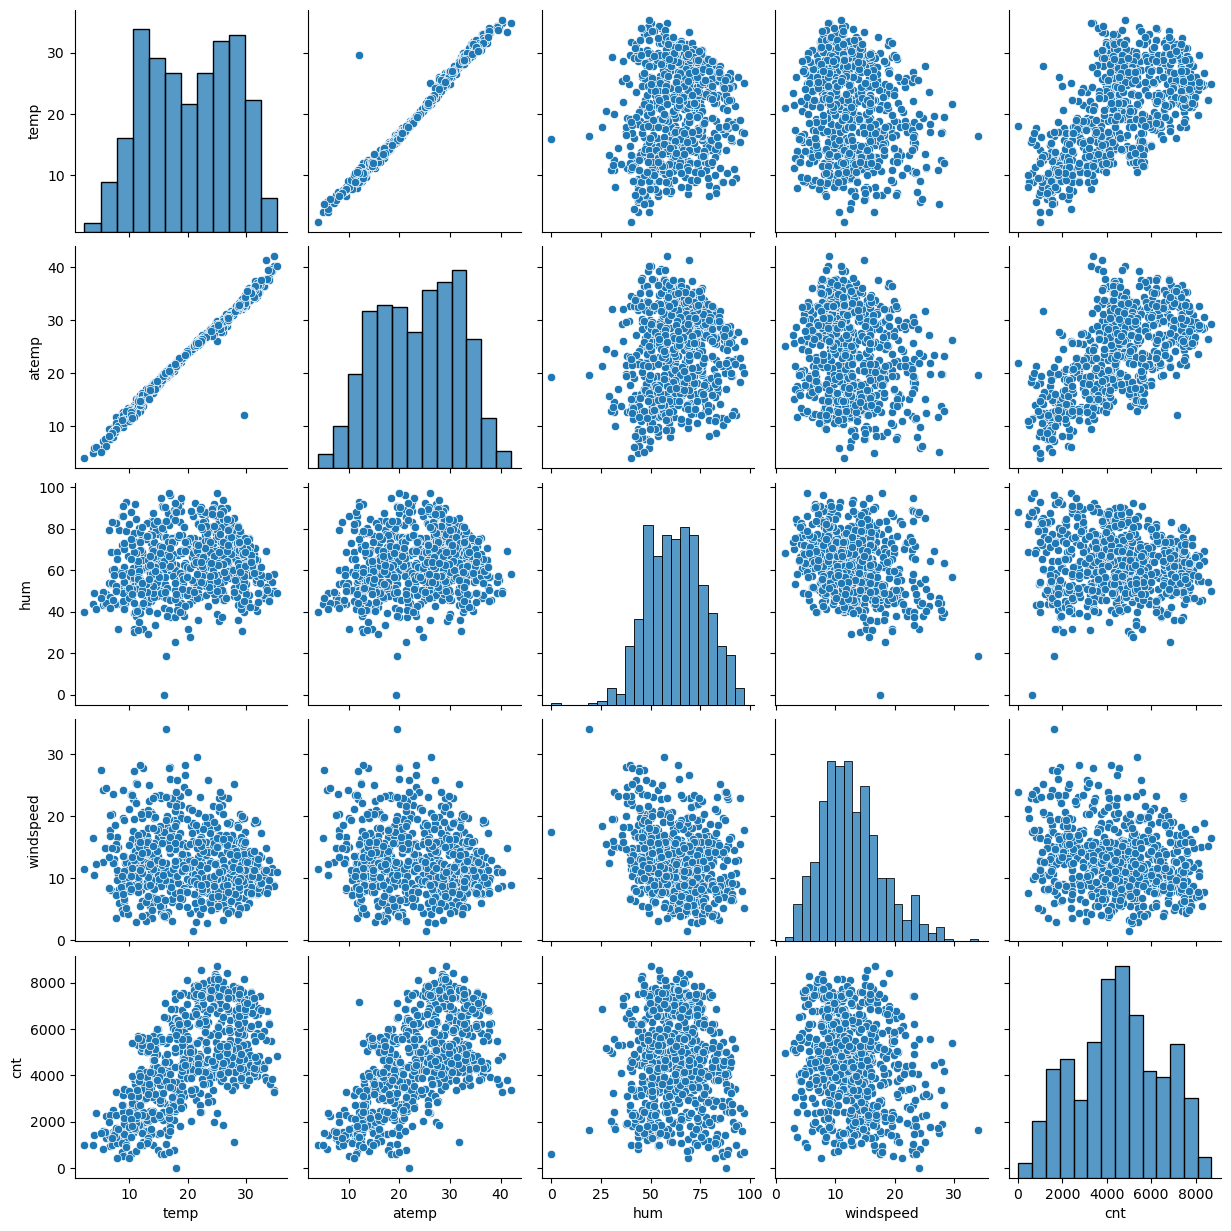

In [31]:
sns.pairplot(data[num_cols])
plt.show()

##### temp, atemp has clear relationship with cnt.

##### Visualizing categorical variables

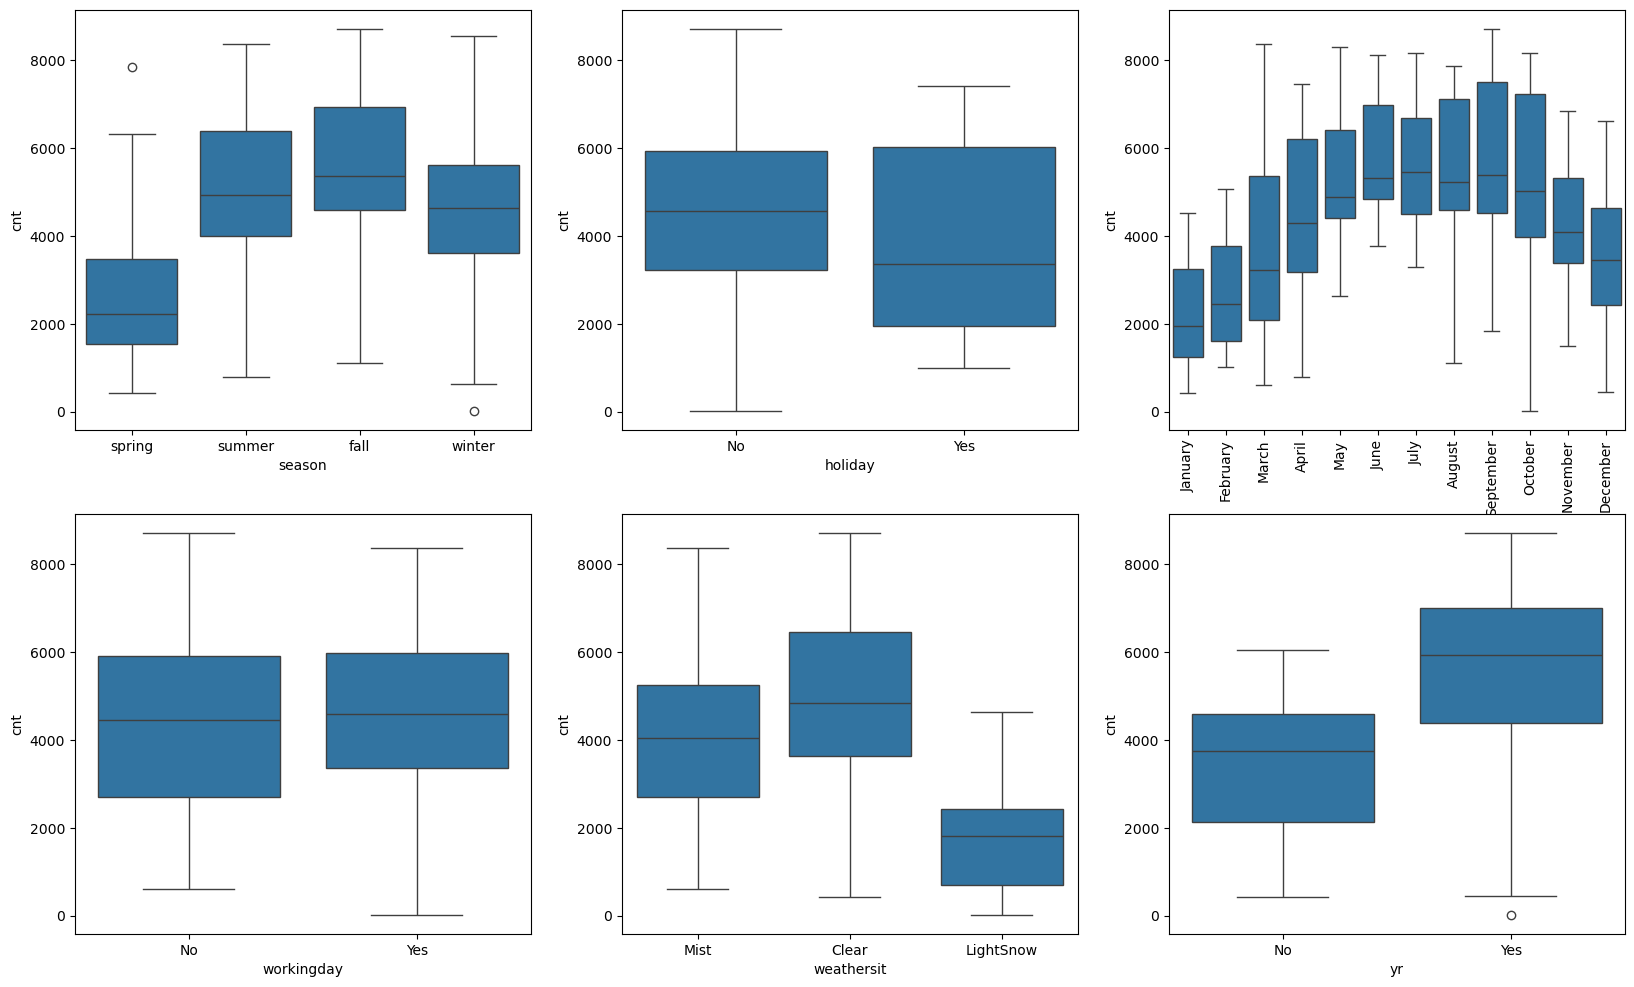

In [32]:

cat_cols = ["season","holiday","yr","mnth","workingday","weathersit","cnt"]

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = data)

plt.show()

##### Season and weathersit ,few months have impact on cnt.

##### Multivariate Analysis

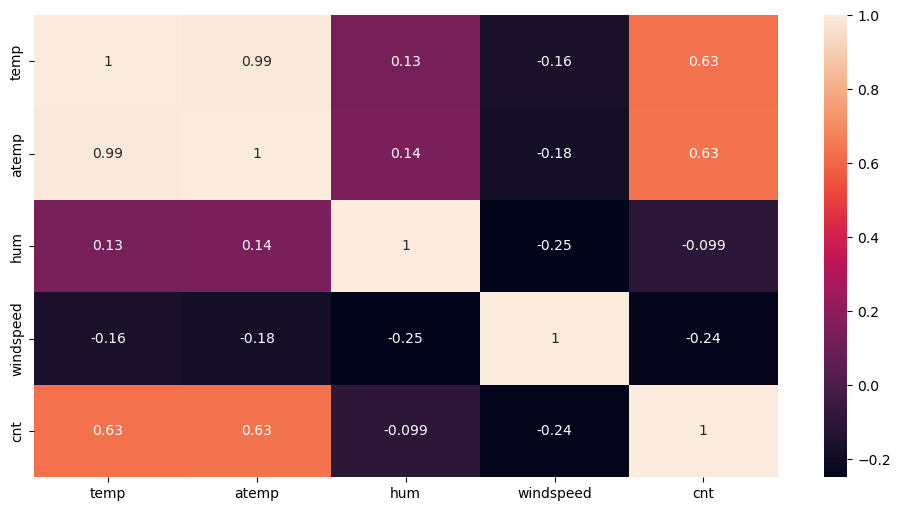

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(data[num_cols].corr(),annot=True)
plt.show()

## Preparing data for modelling.

In [34]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [35]:
data.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,No,January,No,No,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,No,January,No,No,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,No,January,No,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,No,January,No,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,No,January,No,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# Yes/No variables need to be reset back to 1/0
# Mapping dictionary
mapping = {
    "Yes": 1,
    'No': 0
}

# Convert numeric season to string
data['holiday'] = data['holiday'].map(mapping)
data['workingday'] = data['workingday'].map(mapping)
data['yr'] = data['yr'].map(mapping)

In [37]:
data.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy variable creation 

In [38]:
# whenever we have more than 2 categories in categorical features, we need to create dummies for them.
create_dummy_cols = ["season","mnth","weathersit"]

In [39]:
data["weathersit"].value_counts()

weathersit
Clear        463
Mist         246
LightSnow     21
Name: count, dtype: int64

In [40]:
#Number of dummies = n-1
data_updated = pd.get_dummies(data, columns=["season","mnth","weathersit"], drop_first=True, dtype=int) 

In [41]:
data_updated.shape

(730, 24)

In [42]:
data_updated.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

## Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(data_updated,train_size=0.2, random_state=100)

In [44]:
print(df_train.shape)
print(df_test.shape)

(146, 24)
(584, 24)


## Rescaling of features

In [45]:
data_updated.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
# Columns :  " holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
#       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
#       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
#       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
#       'mnth_September', 'weathersit_LightSnow', 'weathersit_Mist'

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Create a list of nuemeric variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.531470,0.563241,0.657411,0.320926,0.496634
std,0.271658,0.253160,0.154937,0.181372,0.263443
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283477,0.337244,0.550121,0.188094,0.302268
50%,0.585995,0.629952,0.666976,0.277922,0.500517
75%,0.779485,0.787106,0.775514,0.414520,0.713917
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow,weathersit_Mist
250,0,0,1,0.746555,0.697057,1.000000,0.318885,0.157514,0,0,...,0,0,0,0,0,0,0,1,1,0
237,0,0,1,0.843981,0.857411,0.810215,0.083449,0.521773,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,1,0.856265,0.849660,0.721078,0.333806,0.523840,0,1,...,0,0,0,0,1,0,0,0,0,0


<Axes: >

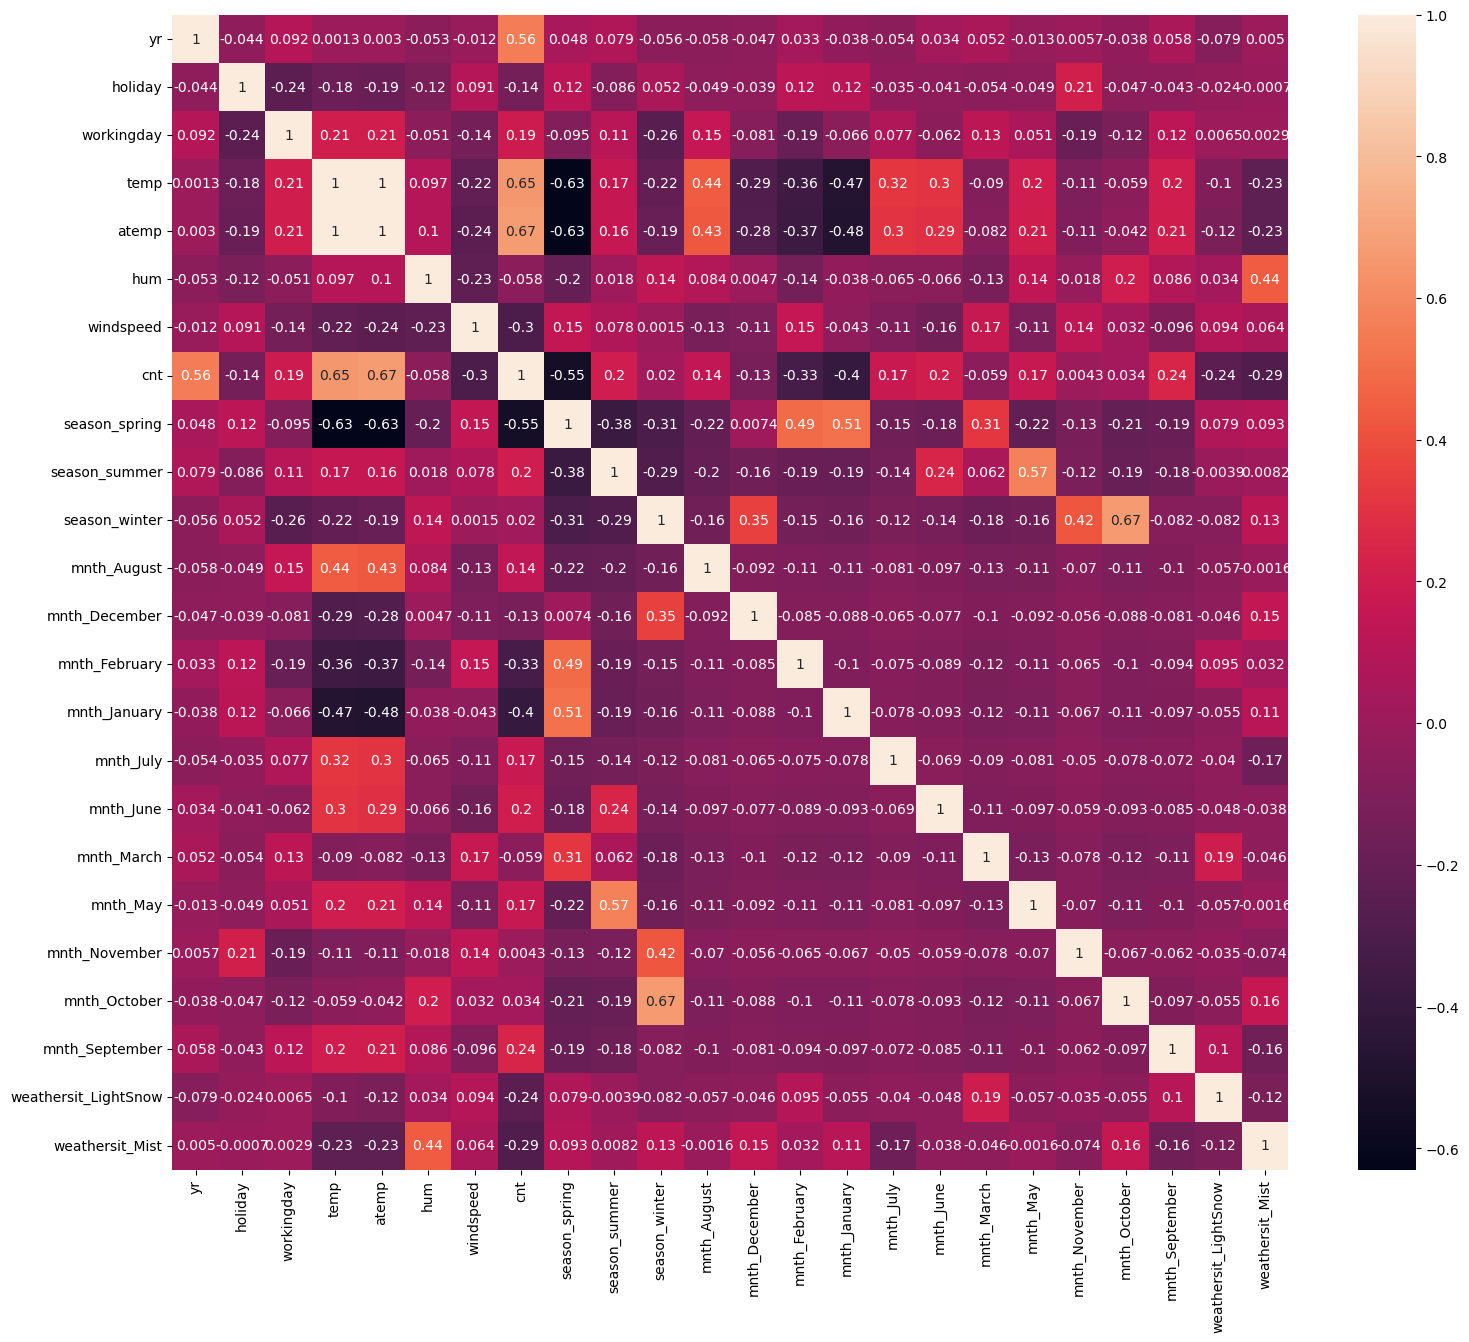

In [50]:
plt.figure(figsize=(18,15))
sns.heatmap(df_train.corr(), annot=True)

### Training the model

In [51]:
# Since there are too many features. We will add all of them first to the model.  
# We will drop features based on it's impact on the R-square.

In [52]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [53]:

#build model with all variables
y_train = df_train.pop('cnt')
X_train = df_train

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     43.64
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           4.90e-48
Time:                        22:18:40   Log-Likelihood:                 150.31
No. Observations:                 146   AIC:                            -252.6
Df Residuals:                     122   BIC:                            -181.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1791      0.105      1.702      0.091      -0.029       0.387
yr                       0.2840      0.016     17.426      0.000       0.252       0.316
holiday                  0.0220      0.060      0.368      0.714      -0.097       0.141
workingday               0.0037      0.021      0.179      0.858      -0.037       0.045
temp                    -0.5507      0.488     -1.129      0.261      -1.516       0.415
atemp                    1.1146      0.498      2.237      0.027       0.128       2.101
hum                     -0.1939      0.066     -2.943      0.004      -0.324      -0.063
windspeed               -0.2162      0.056     -3.891      0.000      -0.326      -0.106
season_spring           -0.0687      0.066     -1.042      0.299      -0.199       0.062
season_summer            0.0766      0.056      1.369      0.173      -0.034       0.187
season_winter            0.0921      0.073      1.258      0.211      -0.053       0.237
mnth_August              0.0251      0.074      0.339      0.735      -0.121       0.171
mnth_December            0.0562      0.074      0.764      0.446      -0.089       0.202
mnth_February            0.0236      0.064      0.367      0.714      -0.104       0.151
mnth_January             0.0212      0.067      0.318      0.751      -0.111       0.153
mnth_July                0.0749      0.078      0.962      0.338      -0.079       0.229
mnth_June                0.0214      0.057      0.375      0.708      -0.091       0.134
mnth_March               0.0701      0.049      1.438      0.153      -0.026       0.167
mnth_May                 0.0404      0.046      0.888      0.376      -0.050       0.131
mnth_November            0.0469      0.085      0.554      0.581      -0.121       0.214
mnth_October             0.0615      0.079      0.780      0.437      -0.095       0.218
mnth_September           0.1406      0.068      2.058      0.042       0.005       0.276
weathersit_LightSnow    -0.1905      0.054     -3.544      0.001      -0.297      -0.084
weathersit_Mist         -0.0686      0.021     -3.233      0.002      -0.111      -0.027
==============================================================================
Omnibus:                       33.853   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.372
Skew:                          -0.819   Prob(JB):                     1.08e-24
Kurtosis:                       6.932   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,1340.39
3,temp,1269.14
5,hum,24.91
7,season_spring,16.37
9,season_winter,15.20
19,mnth_October,9.10
8,season_summer,8.53
10,mnth_August,7.04
13,mnth_January,5.58
6,windspeed,5.30


In [55]:
# Build another model.

X = X_train.drop('workingday', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     45.99
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           7.24e-49
Time:                        22:18:41   Log-Likelihood:                 150.29
No. Observations:                 146   AIC:                            -254.6
Df Residuals:                     123   BIC:                            -186.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1849      0.100      1.853      0.066      -0.013       0.382
yr                       0.2842      0.016     17.552      0.000       0.252       0.316
holiday                  0.0200      0.059      0.341      0.734      -0.096       0.136
temp                    -0.5548      0.485     -1.143      0.255      -1.515       0.406
atemp                    1.1180      0.496      2.254      0.026       0.136       2.100
hum                     -0.1962      0.064     -3.051      0.003      -0.324      -0.069
windspeed               -0.2179      0.054     -4.000      0.000      -0.326      -0.110
season_spring           -0.0694      0.066     -1.058      0.292      -0.199       0.060
season_summer            0.0762      0.056      1.369      0.173      -0.034       0.186
season_winter            0.0900      0.072      1.250      0.214      -0.052       0.232
mnth_August              0.0250      0.074      0.340      0.734      -0.121       0.171
mnth_December            0.0558      0.073      0.762      0.448      -0.089       0.201
mnth_February            0.0220      0.064      0.347      0.729      -0.104       0.148
mnth_January             0.0201      0.066      0.304      0.761      -0.111       0.151
mnth_July                0.0746      0.078      0.963      0.338      -0.079       0.228
mnth_June                0.0202      0.056      0.358      0.721      -0.091       0.132
mnth_March               0.0701      0.049      1.443      0.151      -0.026       0.166
mnth_May                 0.0401      0.045      0.885      0.378      -0.050       0.130
mnth_November            0.0470      0.084      0.557      0.578      -0.120       0.214
mnth_October             0.0620      0.078      0.789      0.431      -0.093       0.217
mnth_September           0.1406      0.068      2.067      0.041       0.006       0.275
weathersit_LightSnow    -0.1902      0.054     -3.554      0.001      -0.296      -0.084
weathersit_Mist         -0.0680      0.021     -3.262      0.001      -0.109      -0.027
==============================================================================
Omnibus:                       33.430   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.641
Skew:                          -0.812   Prob(JB):                     4.23e-24
Kurtosis:                       6.881   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Build VIF- model2

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1301.65
2,temp,1241.50
4,hum,24.82
6,season_spring,16.22
8,season_winter,15.11
18,mnth_October,8.97
7,season_summer,8.20
9,mnth_August,6.83
12,mnth_January,5.56
5,windspeed,5.30


In [57]:
#build 3rd model.

X = X.drop('mnth_August', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     48.52
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.08e-49
Time:                        22:18:41   Log-Likelihood:                 150.23
No. Observations:                 146   AIC:                            -256.5
Df Residuals:                     124   BIC:                            -190.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2020      0.086      2.352      0.020       0.032       0.372
yr                       0.2844      0.016     17.636      0.000       0.252       0.316
holiday                  0.0200      0.058      0.343      0.732      -0.096       0.136
temp                    -0.5066      0.462     -1.095      0.275      -1.422       0.409
atemp                    1.0770      0.479      2.247      0.026       0.128       2.026
hum                     -0.1970      0.064     -3.075      0.003      -0.324      -0.070
windspeed               -0.2221      0.053     -4.203      0.000      -0.327      -0.118
season_spring           -0.0798      0.058     -1.380      0.170      -0.194       0.035
season_summer            0.0637      0.042      1.529      0.129      -0.019       0.146
season_winter            0.0832      0.069      1.207      0.230      -0.053       0.220
mnth_December            0.0480      0.069      0.693      0.490      -0.089       0.185
mnth_February            0.0174      0.062      0.282      0.779      -0.105       0.140
mnth_January             0.0158      0.065      0.245      0.807      -0.112       0.144
mnth_July                0.0523      0.041      1.276      0.204      -0.029       0.133
mnth_June                0.0064      0.039      0.163      0.871      -0.071       0.083
mnth_March               0.0642      0.045      1.420      0.158      -0.025       0.154
mnth_May                 0.0327      0.040      0.825      0.411      -0.046       0.111
mnth_November            0.0377      0.080      0.475      0.636      -0.120       0.195
mnth_October             0.0515      0.072      0.716      0.476      -0.091       0.194
mnth_September           0.1213      0.037      3.267      0.001       0.048       0.195
weathersit_LightSnow    -0.1899      0.053     -3.561      0.001      -0.295      -0.084
weathersit_Mist         -0.0670      0.021     -3.257      0.001      -0.108      -0.026
==============================================================================
Omnibus:                       33.417   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.407
Skew:                          -0.816   Prob(JB):                     7.84e-24
Kurtosis:                       6.851   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#build 3rd model.

X = X.drop('mnth_January', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     51.33
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.53e-50
Time:                        22:18:41   Log-Likelihood:                 150.19
No. Observations:                 146   AIC:                            -258.4
Df Residuals:                     125   BIC:                            -195.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2105      0.078      2.690      0.008       0.056       0.365
yr                       0.2841      0.016     17.722      0.000       0.252       0.316
holiday                  0.0204      0.058      0.351      0.726      -0.095       0.136
temp                    -0.5113      0.460     -1.111      0.269      -1.422       0.400
atemp                    1.0727      0.477      2.248      0.026       0.128       2.017
hum                     -0.1966      0.064     -3.082      0.003      -0.323      -0.070
windspeed               -0.2237      0.052     -4.281      0.000      -0.327      -0.120
season_spring           -0.0731      0.051     -1.439      0.153      -0.174       0.027
season_summer            0.0630      0.041      1.520      0.131      -0.019       0.145
season_winter            0.0878      0.066      1.330      0.186      -0.043       0.218
mnth_December            0.0369      0.052      0.707      0.481      -0.066       0.140
mnth_February            0.0049      0.035      0.141      0.888      -0.064       0.074
mnth_July                0.0520      0.041      1.273      0.205      -0.029       0.133
mnth_June                0.0059      0.039      0.152      0.879      -0.071       0.083
mnth_March               0.0564      0.032      1.762      0.081      -0.007       0.120
mnth_May                 0.0315      0.039      0.804      0.423      -0.046       0.109
mnth_November            0.0288      0.070      0.409      0.683      -0.111       0.168
mnth_October             0.0432      0.063      0.683      0.496      -0.082       0.169
mnth_September           0.1192      0.036      3.310      0.001       0.048       0.190
weathersit_LightSnow    -0.1901      0.053     -3.580      0.000      -0.295      -0.085
weathersit_Mist         -0.0669      0.020     -3.266      0.001      -0.108      -0.026
==============================================================================
Omnibus:                       33.650   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.346
Skew:                          -0.811   Prob(JB):                     1.09e-24
Kurtosis:                       6.938   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1281.96
2,temp,1185.71
4,hum,21.39
8,season_winter,12.61
6,season_spring,8.12
16,mnth_October,6.35
7,season_summer,5.95
5,windspeed,5.29
15,mnth_November,3.40
9,mnth_December,3.07


In [60]:
#build 3rd model.

X = X.drop('mnth_February', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     54.45
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.07e-51
Time:                        22:18:41   Log-Likelihood:                 150.18
No. Observations:                 146   AIC:                            -260.4
Df Residuals:                     126   BIC:                            -200.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2105      0.078      2.700      0.008       0.056       0.365
yr                       0.2842      0.016     17.809      0.000       0.253       0.316
holiday                  0.0207      0.058      0.357      0.722      -0.094       0.135
temp                    -0.5126      0.458     -1.118      0.266      -1.420       0.395
atemp                    1.0742      0.475      2.260      0.026       0.134       2.015
hum                     -0.1969      0.064     -3.099      0.002      -0.323      -0.071
windspeed               -0.2229      0.052     -4.307      0.000      -0.325      -0.120
season_spring           -0.0713      0.049     -1.456      0.148      -0.168       0.026
season_summer            0.0632      0.041      1.532      0.128      -0.018       0.145
season_winter            0.0892      0.065      1.370      0.173      -0.040       0.218
mnth_December            0.0353      0.051      0.696      0.488      -0.065       0.136
mnth_July                0.0518      0.041      1.275      0.205      -0.029       0.132
mnth_June                0.0056      0.039      0.146      0.884      -0.071       0.082
mnth_March               0.0547      0.030      1.849      0.067      -0.004       0.113
mnth_May                 0.0312      0.039      0.800      0.425      -0.046       0.108
mnth_November            0.0271      0.069      0.392      0.696      -0.110       0.164
mnth_October             0.0417      0.062      0.671      0.503      -0.081       0.165
mnth_September           0.1188      0.036      3.321      0.001       0.048       0.190
weathersit_LightSnow    -0.1892      0.052     -3.607      0.000      -0.293      -0.085
weathersit_Mist         -0.0670      0.020     -3.280      0.001      -0.107      -0.027
==============================================================================
Omnibus:                       33.629   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.737
Skew:                          -0.808   Prob(JB):                     8.99e-25
Kurtosis:                       6.948   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1281.31
2,temp,1185.19
4,hum,21.36
8,season_winter,12.32
6,season_spring,7.33
15,mnth_October,6.16
7,season_summer,5.94
5,windspeed,5.22
14,mnth_November,3.30
9,mnth_December,2.92


In [62]:
X = X.drop('mnth_June', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     57.92
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.70e-52
Time:                        22:18:41   Log-Likelihood:                 150.17
No. Observations:                 146   AIC:                            -262.3
Df Residuals:                     127   BIC:                            -205.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2099      0.078      2.706      0.008       0.056       0.363
yr                       0.2841      0.016     17.896      0.000       0.253       0.315
holiday                  0.0207      0.058      0.358      0.721      -0.094       0.135
temp                    -0.4966      0.443     -1.120      0.265      -1.374       0.381
atemp                    1.0615      0.465      2.281      0.024       0.140       1.983
hum                     -0.1978      0.063     -3.144      0.002      -0.322      -0.073
windspeed               -0.2250      0.050     -4.530      0.000      -0.323      -0.127
season_spring           -0.0693      0.047     -1.480      0.141      -0.162       0.023
season_summer            0.0657      0.037      1.767      0.080      -0.008       0.139
season_winter            0.0905      0.064      1.411      0.161      -0.036       0.217
mnth_December            0.0353      0.051      0.699      0.486      -0.065       0.135
mnth_July                0.0505      0.039      1.280      0.203      -0.028       0.128
mnth_March               0.0535      0.028      1.890      0.061      -0.002       0.110
mnth_May                 0.0284      0.034      0.835      0.405      -0.039       0.096
mnth_November            0.0271      0.069      0.394      0.694      -0.109       0.163
mnth_October             0.0413      0.062      0.668      0.505      -0.081       0.164
mnth_September           0.1184      0.036      3.333      0.001       0.048       0.189
weathersit_LightSnow    -0.1890      0.052     -3.619      0.000      -0.292      -0.086
weathersit_Mist         -0.0668      0.020     -3.290      0.001      -0.107      -0.027
==============================================================================
Omnibus:                       33.080   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.755
Skew:                          -0.797   Prob(JB):                     3.99e-24
Kurtosis:                       6.895   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X = X.drop('mnth_November', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     61.73
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           3.64e-53
Time:                        22:18:41   Log-Likelihood:                 150.08
No. Observations:                 146   AIC:                            -264.2
Df Residuals:                     128   BIC:                            -210.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2088      0.077      2.703      0.008       0.056       0.362
yr                       0.2844      0.016     18.009      0.000       0.253       0.316
holiday                  0.0228      0.057      0.399      0.691      -0.090       0.136
temp                    -0.4889      0.442     -1.107      0.270      -1.363       0.385
atemp                    1.0528      0.463      2.272      0.025       0.136       1.970
hum                     -0.1947      0.062     -3.129      0.002      -0.318      -0.072
windspeed               -0.2217      0.049     -4.543      0.000      -0.318      -0.125
season_spring           -0.0694      0.047     -1.487      0.139      -0.162       0.023
season_summer            0.0647      0.037      1.749      0.083      -0.009       0.138
season_winter            0.1075      0.047      2.266      0.025       0.014       0.201
mnth_December            0.0228      0.039      0.583      0.561      -0.055       0.100
mnth_July                0.0496      0.039      1.264      0.208      -0.028       0.127
mnth_March               0.0528      0.028      1.875      0.063      -0.003       0.108
mnth_May                 0.0285      0.034      0.841      0.402      -0.039       0.096
mnth_October             0.0232      0.041      0.562      0.575      -0.058       0.105
mnth_September           0.1159      0.035      3.327      0.001       0.047       0.185
weathersit_LightSnow    -0.1897      0.052     -3.646      0.000      -0.293      -0.087
weathersit_Mist         -0.0676      0.020     -3.356      0.001      -0.107      -0.028
==============================================================================
Omnibus:                       33.427   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.988
Skew:                          -0.807   Prob(JB):                     2.16e-24
Kurtosis:                       6.913   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
X = X.drop(['mnth_October','mnth_December'], axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     70.77
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           6.40e-55
Time:                        22:18:41   Log-Likelihood:                 149.82
No. Observations:                 146   AIC:                            -267.6
Df Residuals:                     130   BIC:                            -219.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2115      0.073      2.890      0.005       0.067       0.356
yr                       0.2841      0.016     18.105      0.000       0.253       0.315
holiday                  0.0156      0.056      0.279      0.781      -0.095       0.126
temp                    -0.4896      0.439     -1.116      0.267      -1.358       0.379
atemp                    1.0516      0.460      2.285      0.024       0.141       1.962
hum                     -0.1947      0.061     -3.183      0.002      -0.316      -0.074
windspeed               -0.2247      0.048     -4.715      0.000      -0.319      -0.130
season_spring           -0.0689      0.046     -1.507      0.134      -0.159       0.022
season_summer            0.0640      0.036      1.754      0.082      -0.008       0.136
season_winter            0.1234      0.039      3.167      0.002       0.046       0.200
mnth_July                0.0494      0.039      1.266      0.208      -0.028       0.126
mnth_March               0.0516      0.028      1.852      0.066      -0.004       0.107
mnth_May                 0.0281      0.034      0.835      0.405      -0.038       0.095
mnth_September           0.1140      0.035      3.303      0.001       0.046       0.182
weathersit_LightSnow    -0.1894      0.052     -3.666      0.000      -0.292      -0.087
weathersit_Mist         -0.0656      0.020     -3.316      0.001      -0.105      -0.026
==============================================================================
Omnibus:                       31.445   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.266
Skew:                          -0.766   Prob(JB):                     4.59e-22
Kurtosis:                       6.715   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X = X.drop(['mnth_March','mnth_May'], axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     80.43
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           4.51e-56
Time:                        22:18:41   Log-Likelihood:                 147.85
No. Observations:                 146   AIC:                            -267.7
Df Residuals:                     132   BIC:                            -225.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1699      0.070      2.440      0.016       0.032       0.308
yr                       0.2834      0.016     18.044      0.000       0.252       0.314
holiday                  0.0128      0.056      0.228      0.820      -0.098       0.124
temp                    -0.5859      0.437     -1.341      0.182      -1.450       0.279
atemp                    1.1918      0.456      2.614      0.010       0.290       2.094
hum                     -0.1919      0.061     -3.150      0.002      -0.312      -0.071
windspeed               -0.2171      0.047     -4.609      0.000      -0.310      -0.124
season_spring           -0.0354      0.042     -0.843      0.401      -0.118       0.048
season_summer            0.0904      0.030      2.983      0.003       0.030       0.150
season_winter            0.1364      0.038      3.570      0.000       0.061       0.212
mnth_July                0.0497      0.039      1.267      0.207      -0.028       0.127
mnth_September           0.1150      0.035      3.316      0.001       0.046       0.184
weathersit_LightSnow    -0.1689      0.051     -3.342      0.001      -0.269      -0.069
weathersit_Mist         -0.0671      0.020     -3.375      0.001      -0.106      -0.028
==============================================================================
Omnibus:                       25.961   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.135
Skew:                          -0.641   Prob(JB):                     7.98e-17
Kurtosis:                       6.247   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1192.55
2,temp,1078.49
4,hum,19.65
6,season_spring,6.04
5,windspeed,4.28
8,season_winter,4.07
7,season_summer,3.48
12,weathersit_Mist,2.22
0,yr,2.04
10,mnth_September,1.64


In [67]:
X = X.drop('temp', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     86.47
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.15e-56
Time:                        22:18:41   Log-Likelihood:                 146.86
No. Observations:                 146   AIC:                            -267.7
Df Residuals:                     133   BIC:                            -228.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1947      0.067      2.893      0.004       0.062       0.328
yr                       0.2821      0.016     17.943      0.000       0.251       0.313
holiday                  0.0020      0.056      0.036      0.971      -0.108       0.112
atemp                    0.5851      0.055     10.681      0.000       0.477       0.693
hum                     -0.1939      0.061     -3.174      0.002      -0.315      -0.073
windspeed               -0.2328      0.046     -5.087      0.000      -0.323      -0.142
season_spring           -0.0156      0.039     -0.396      0.693      -0.093       0.062
season_summer            0.1022      0.029      3.509      0.001       0.045       0.160
season_winter            0.1586      0.035      4.596      0.000       0.090       0.227
mnth_July                0.0444      0.039      1.134      0.259      -0.033       0.122
mnth_September           0.1238      0.034      3.624      0.000       0.056       0.191
weathersit_LightSnow    -0.1838      0.049     -3.717      0.000      -0.282      -0.086
weathersit_Mist         -0.0680      0.020     -3.412      0.001      -0.107      -0.029
==============================================================================
Omnibus:                       26.835   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.063
Skew:                          -0.654   Prob(JB):                     6.79e-18
Kurtosis:                       6.359   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.16
2,atemp,10.21
4,windspeed,4.17
5,season_spring,3.74
6,season_summer,2.81
7,season_winter,2.58
11,weathersit_Mist,2.21
0,yr,2.03
9,mnth_September,1.54
8,mnth_July,1.37


In [69]:
X = X.drop('season_spring', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     94.91
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.24e-57
Time:                        22:18:41   Log-Likelihood:                 146.77
No. Observations:                 146   AIC:                            -269.5
Df Residuals:                     134   BIC:                            -233.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1758      0.047      3.726      0.000       0.082       0.269
yr                       0.2813      0.016     18.106      0.000       0.251       0.312
holiday                  0.0030      0.055      0.053      0.958      -0.107       0.113
atemp                    0.6011      0.037     16.322      0.000       0.528       0.674
hum                     -0.1924      0.061     -3.165      0.002      -0.313      -0.072
windspeed               -0.2334      0.046     -5.119      0.000      -0.324      -0.143
season_summer            0.1106      0.020      5.567      0.000       0.071       0.150
season_winter            0.1694      0.021      7.948      0.000       0.127       0.212
mnth_July                0.0487      0.037      1.301      0.196      -0.025       0.123
mnth_September           0.1295      0.031      4.199      0.000       0.068       0.190
weathersit_LightSnow    -0.1830      0.049     -3.715      0.000      -0.280      -0.086
weathersit_Mist         -0.0679      0.020     -3.420      0.001      -0.107      -0.029
==============================================================================
Omnibus:                       25.655   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.042
Skew:                          -0.633   Prob(JB):                     1.38e-16
Kurtosis:                       6.226   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X = X.drop('holiday', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     105.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.18e-58
Time:                        22:18:41   Log-Likelihood:                 146.77
No. Observations:                 146   AIC:                            -271.5
Df Residuals:                     135   BIC:                            -238.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1762      0.046      3.794      0.000       0.084       0.268
yr                       0.2813      0.015     18.192      0.000       0.251       0.312
atemp                    0.6008      0.036     16.548      0.000       0.529       0.673
hum                     -0.1926      0.060     -3.191      0.002      -0.312      -0.073
windspeed               -0.2333      0.045     -5.139      0.000      -0.323      -0.144
season_summer            0.1105      0.020      5.591      0.000       0.071       0.150
season_winter            0.1694      0.021      7.979      0.000       0.127       0.211
mnth_July                0.0487      0.037      1.306      0.194      -0.025       0.123
mnth_September           0.1295      0.031      4.214      0.000       0.069       0.190
weathersit_LightSnow    -0.1831      0.049     -3.736      0.000      -0.280      -0.086
weathersit_Mist         -0.0679      0.020     -3.433      0.001      -0.107      -0.029
==============================================================================
Omnibus:                       25.661   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.096
Skew:                          -0.633   Prob(JB):                     1.34e-16
Kurtosis:                       6.227   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,12.00
1,atemp,7.71
3,windspeed,3.26
9,weathersit_Mist,2.15
0,yr,1.90
4,season_summer,1.75
5,season_winter,1.48
7,mnth_September,1.32
6,mnth_July,1.31
8,weathersit_LightSnow,1.13


In [72]:
X = X.drop('mnth_July', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.45e-59
Time:                        22:18:41   Log-Likelihood:                 145.86
No. Observations:                 146   AIC:                            -271.7
Df Residuals:                     136   BIC:                            -241.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1762      0.047      3.785      0.000       0.084       0.268
yr                       0.2806      0.015     18.112      0.000       0.250       0.311
atemp                    0.6158      0.035     17.830      0.000       0.548       0.684
hum                     -0.1943      0.061     -3.211      0.002      -0.314      -0.075
windspeed               -0.2347      0.045     -5.158      0.000      -0.325      -0.145
season_summer            0.1037      0.019      5.425      0.000       0.066       0.142
season_winter            0.1656      0.021      7.854      0.000       0.124       0.207
mnth_September           0.1208      0.030      4.017      0.000       0.061       0.180
weathersit_LightSnow    -0.1831      0.049     -3.727      0.000      -0.280      -0.086
weathersit_Mist         -0.0702      0.020     -3.551      0.001      -0.109      -0.031
==============================================================================
Omnibus:                       23.860   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.250
Skew:                          -0.575   Prob(JB):                     1.51e-15
Kurtosis:                       6.146   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,11.99
1,atemp,6.84
3,windspeed,3.26
8,weathersit_Mist,2.14
0,yr,1.90
4,season_summer,1.63
5,season_winter,1.46
6,mnth_September,1.26
7,weathersit_LightSnow,1.13


In [74]:
X = X.drop('hum', axis=1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     121.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           3.00e-58
Time:                        22:18:41   Log-Likelihood:                 140.52
No. Observations:                 146   AIC:                            -263.0
Df Residuals:                     137   BIC:                            -236.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0623      0.031      2.000      0.047       0.001       0.124
yr                       0.2838      0.016     17.763      0.000       0.252       0.315
atemp                    0.5956      0.035     16.971      0.000       0.526       0.665
windspeed               -0.1973      0.045     -4.341      0.000      -0.287      -0.107
season_summer            0.0989      0.020      5.021      0.000       0.060       0.138
season_winter            0.1550      0.022      7.202      0.000       0.112       0.198
mnth_September           0.1072      0.031      3.482      0.001       0.046       0.168
weathersit_LightSnow    -0.2072      0.050     -4.129      0.000      -0.306      -0.108
weathersit_Mist         -0.1026      0.018     -5.847      0.000      -0.137      -0.068
==============================================================================
Omnibus:                       26.841   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.471
Skew:                          -0.648   Prob(JB):                     3.36e-18
Kurtosis:                       6.399   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.12
2,windspeed,2.90
0,yr,1.84
3,season_summer,1.62
7,weathersit_Mist,1.50
4,season_winter,1.33
5,mnth_September,1.25
6,weathersit_LightSnow,1.08


### Residual analysis

<Figure size 640x480 with 0 Axes>

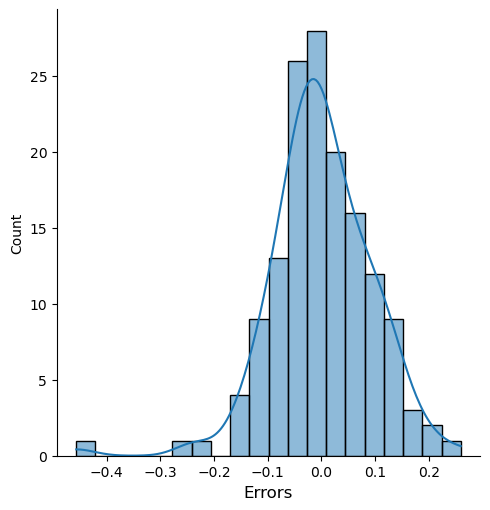

In [76]:
y_train_pred = lr_model.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_pred), bins = 20 , kde=True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

## Predictions and evaluation on the Test set.

In [77]:
#Create a list of nuemeric variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow,weathersit_Mist
184,0,1,0,0.883293,0.866144,0.678949,0.078074,0.700349,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.965602,0.951501,0.630167,0.148050,0.722057,0,1,...,0,0,1,0,0,0,0,0,0,0
299,0,0,1,0.504914,0.546008,0.865206,0.329739,0.263083,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.942261,0.896204,0.451450,0.335139,0.537150,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.866094,0.833150,0.324618,0.534310,0.561442,0,1,...,0,0,1,0,0,0,0,0,0,0


In [78]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.503425,0.030822,0.671233,0.545434,0.575270,0.670677,0.312299,0.503346,0.236301,0.250000,...,0.082192,0.092466,0.083904,0.075342,0.080479,0.092466,0.082192,0.082192,0.029110,0.337329
std,0.500417,0.172983,0.470168,0.269637,0.249914,0.150689,0.164397,0.246948,0.425174,0.433384,...,0.274892,0.289931,0.277482,0.264169,0.272267,0.289931,0.274892,0.274892,0.168258,0.473203
min,0.000000,0.000000,0.000000,-0.100791,-0.034704,0.270516,-0.049804,-0.077659,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.315725,0.364406,0.555110,0.193813,0.336155,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.538699,0.580458,0.666532,0.294078,0.507559,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.777949,0.777891,0.777620,0.406062,0.684778,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.082311,1.135745,1.035053,0.815634,1.045484,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = df_test.pop("cnt")
X_test = df_test

In [82]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [85]:
X_test_lm = sm.add_constant(X_test)

# Drop variables which are not there in trained model;
X_test_lm  = X_test_lm.drop(['holiday', 'workingday', 'temp', 'hum','season_spring', 'mnth_August','mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October'], axis=1)

#predict
y_test_pred = lr_model.predict(X_test_lm)

## R2_Score

In [86]:
#evaluate
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred=y_test_pred)

0.776808985233228

In [89]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train : ", round(r2_train,2), "Test : ", round(r2_test,2))

Train :  0.88 Test :  0.78


The model predicts the number of bike rentals (cnt) based on these variables. It uses a statistical technique called Ordinary Least Squares (OLS) Regression to find the best-fitting relationship between the variables.

##### Interpretation:

The model explains around 87.6% of the variation in bike sharing.
Some variables like temperature, "feels like" temperature, and season have a positive impact on bike rentals.
Wind speed and certain weather conditions (light snow, mist) negatively impact bike rentals.
The model also considers the effects of holidays, working days, and specific months on bike rentals.
Limitations and Considerations:

The model assumes a linear relationship between the variables, which might not be entirely accurate.
The residuals (prediction errors) are not perfectly normally distributed, which could affect the reliability of the model's predictions.Autocorrelation in the residuals might be present, which could violate the model's assumptions.

Overall, the model provides a useful framework for understanding the factors influencing bike rentals. However, it's important to consider its limitations and conduct further analysis to improve its accuracy and reliability.